# 02 - Logistic regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt                        # To create plots
import numpy as np                                     # To perform calculations quickly
import pandas as pd                                    # To load in and manipulate data
from sklearn import linear_model, datasets             # Linear model
from sklearn.model_selection import train_test_split   # Split up the data in a train and test set
from ipywidgets import interact,widgets                # For interactive execution of code

In [2]:
# Import the data
data=pd.read_csv("../data/apples.csv")
data

,roundness,greenness,apple
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1
5,7,7,1
6,6,3,0
7,3,3,0
8,9,5,1
9,9,3,1


In [3]:
# Split into features and targets
features=data.drop('apple',axis=1)
targets=data['apple']

### Linear regression
Why not linear regression? Let's try

In [4]:
# Initialize the model
lin_model=linear_model.LinearRegression()
# Fit the data
lin_model.fit(features.roundness.values.reshape(-1,1),targets)
# Look at the score of the model
lin_model.score(features.roundness.values.reshape(-1,1),targets)

0.5862027546444586

<Axes: xlabel='roundness', ylabel='greenness'>

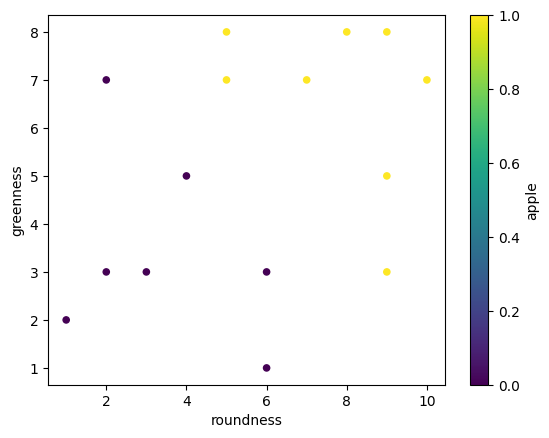

In [5]:
# Plot the data
fig, ax = plt.subplots()

data.plot(x='roundness',y='greenness',c='apple',kind="scatter", cmap='viridis',ax=ax)

In [6]:
@interact(roundness=(0,10,1))
def linear_regression(roundness=0):
    fig, ax = plt.subplots()
    plot=data.plot(x='roundness',y='apple',c='apple',kind="scatter", cmap='viridis', ax=ax)
    plt.plot([0,10],lin_model.predict([[0],[10]]),c="orange")
    plt.scatter([roundness],result_value:=lin_model.predict([[roundness]]))
    #plt.hlines(0.5,0,10)
    plt.show()
    print(f"The sample with roundness {roundness} results in a value {result_value[0]} for apple")

interactive(children=(IntSlider(value=0, description='roundness', max=10), Output()), _dom_classes=('widget-in…

### Logistic regression
We want our model to return a value between 0 and 1.

$0 \leq h_\theta(x) \leq 1$

$h_\theta(x)$ = the predicted chance that y=1 with input x

e.g $h_\theta(x) = 0.8$ => The model is 80% sure that it's an apple

For this the **logistic function** is used:
#### Logistic function

$h_\theta(x) = \frac{1}{1+e^{-Z}}$ with $Z=\theta^Tx $

$\theta^Tx $ is just the intercept + the coefficient times the value for each feature $\theta_0 + \theta_1f1 + \theta_2f2$

Next we can change this into a **classifier** instead of a regression model:

$y=1$ if $h_\theta(x) \geq 0.5 \Rightarrow \theta^Tx\geq 0$

$y=0$ if $h_\theta(x) \lt 0.5 \Rightarrow \theta^Tx\lt 0$

Our final model is in the form:

$h_\theta(x) = g(\theta_0+\theta_1x_1+\theta_2x_2+\theta_{...}x_{...}+\theta_nx_n)$

<br><br>

**Example:**
Imagine: x1 = roundness, x2 = greenness

After training: $\theta_0$ = -40, $\theta_1$ = 4 and $\theta_2$ = 4

Then:

y=1 if $-40+4x_1+4x_2 \geq 0$

y=0 if $-40+4x_1+4x_2 \lt 0$


In [7]:
@interact(roundness=(0,10,0.1), greenness=(0,10,0.1))
def logistic_regression_example(roundness=8,greenness=6):
    result=-40+4*roundness+4*greenness
    print(f"-40+4*{roundness}+4*{greenness} = {result} => {'Appel' if result>=0 else 'Not apple'}")
    print("\nHow sure is our model?")
    exp_result = 1/(1+np.exp(-result))
    print(f"\nLogistic function: 1/(1+e^({-result})) = {exp_result}")
    print(f"\nThe model is {round(exp_result*100,2)}% sure that this is an apple")

interactive(children=(FloatSlider(value=8.0, description='roundness', max=10.0), FloatSlider(value=6.0, descri…

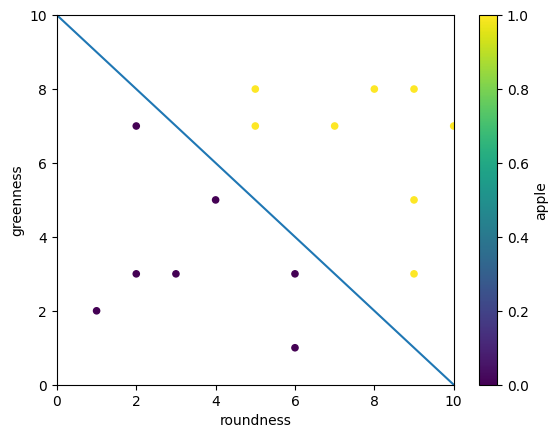

In [8]:
# Graphical representation of the decision boundary

fig, ax = plt.subplots()

data.plot(x='roundness',y='greenness',c='apple',kind="scatter", cmap='viridis',ax=ax, xlim=(0,10),ylim=(0,10))

# The decision boundary is where Z==0, let's search the greenness value for each roundness value 
# where this is the case between 0 and 10
x_values= list(range(11))
y_values= []
for x in x_values:
    # result=-40+4*roundness+4*greenness
    # Thus: greenness = (result+40-4*roundness)/4
    # result = 0 => greenness = 10-roundness
    y= 10-x
    y_values.append(y)

# Plot this:
plt.plot(x_values,y_values)                   # As a line
#plt.scatter(x_values,y_values,color="orange") # The individual calculated values
plt.show()

### sklearn implementation
hyperparameter **C**

C is the inverse of the regularization strength

The opposite of alpha (or $\lambda$) in linear regression:
* Large C-values: the more **c**omplex the model, the more overfitting
* Small C-values: the less complex the model, fewer overfitting
=> Must be a positive float

By default: logistic regression will use L2 regularization, this can be changed with the penalty parameter

In [9]:
# Initialise the model
logreg_model=linear_model.LogisticRegression(penalty="l2", C=1e5) # penalty here is not required since default is l2
# Fit the data to the model
logreg_model.fit(features,targets)
# Take a look at the score
score = logreg_model.score(features,targets)
print(f"Score: {score}") # This is the accuracy of the model
print("Coefficients: ", coefs:=logreg_model.coef_[0])
print("Intercept: ", intercept:=logreg_model.intercept_)

Score: 1.0
Coefficients:  [5.29416066 5.00200625]
Intercept:  [-54.18842193]


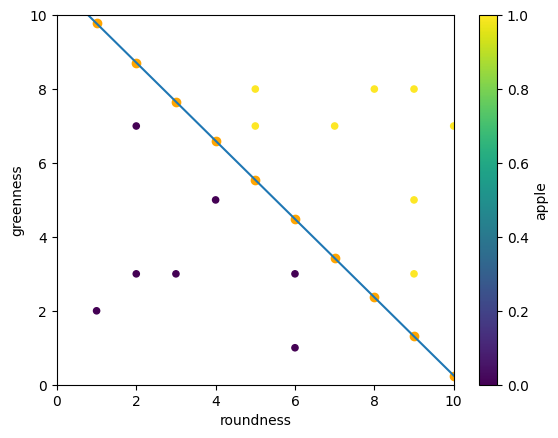

In [10]:
# Actual decision boundary by the model:
# Graphical representation of the decision boundary

fig, ax = plt.subplots()

data.plot(x='roundness',y='greenness',c='apple',kind="scatter", cmap='viridis',ax=ax, xlim=(0,10),ylim=(0,10))

# The decision boundary is where Z==0, let's search the greenness value for each roundness value 
# where this is the case between 0 and 10
x_values= list(range(11))
y_values= []
for x in x_values:
    y= (-intercept-coefs[0]*x)/coefs[1]
    y_values.append(y)

# Plot this:
plt.plot(x_values,y_values)                   # As a line
plt.scatter(x_values,y_values,color="orange") # The individual calculated values
plt.show()

In [11]:
# Classify a new sample
# Roundness = 8 and greenness = 6:
print("Roundness = 8 and greenness = 6:")
sample=np.array([8,6]).reshape(1,-1)
# Reshape is needed because sklearn expects multiple samples, so in this case a list of lists (samples)
# Take a look at the output of the following for a visual explanation:
# print("Before reshape: ",np.array([8,6]),"\nAfter reshape", sample)

print("Apple:", logreg_model.predict(sample))
probabilities = logreg_model.predict_proba(sample)
print("Probability [chance for not apple, chance for apple]", probabilities)

# Roundness = 4 and greenness = 4:
print("\nRoundness = 4 and greenness = 4:")
sample=np.array([4,4]).reshape(1,-1)
print("Apple:", logreg_model.predict(sample))
probabilities = logreg_model.predict_proba(sample)
print("Probability [chance for not apple, chance for apple]", probabilities)

# Multiple new samples at once:
print("\nSample 1: Roundness = 8 and greenness = 6")
print("Sample 2: Roundness = 4 and greenness = 4")
samples=np.array([[8,6],[4,4]])
print("Apple:", logreg_model.predict(samples))
probabilities = logreg_model.predict_proba(samples)
print("Probability [chance for not apple, chance for apple]", probabilities)

# Informative: how to get the index of the largest value of a list (go from predict_proba to predict manually)
np.argmax(probabilities,axis=1)

Roundness = 8 and greenness = 6:
Apple: [1]
Probability [chance for not apple, chance for apple] [[1.27606340e-08 9.99999987e-01]]

Roundness = 4 and greenness = 4:
Apple: [0]
Probability [chance for not apple, chance for apple] [[9.99997748e-01 2.25185433e-06]]

Sample 1: Roundness = 8 and greenness = 6
Sample 2: Roundness = 4 and greenness = 4
Apple: [1 0]
Probability [chance for not apple, chance for apple] [[1.27606340e-08 9.99999987e-01]
 [9.99997748e-01 2.25185433e-06]]


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature nam

array([1, 0])

#### Non-linear dividable datasets

In [12]:
data=pd.read_csv("../data/apples_non_linear.csv")
data
# Split into features and targets
features=data.drop('apple',axis=1)
targets=data['apple']

<Axes: xlabel='roundness', ylabel='greenness'>

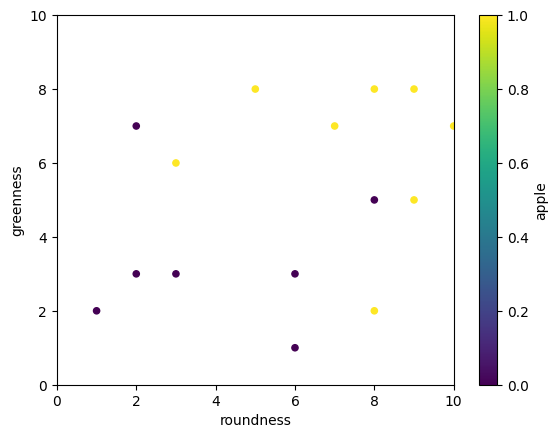

In [13]:
fig, ax = plt.subplots()

data.plot(x='roundness',y='greenness',c='apple',kind="scatter", cmap='viridis',ax=ax, xlim=(0,10),ylim=(0,10))

In [14]:
logreg_model=linear_model.LogisticRegression(penalty="l2", C=1e5) # penalty here is not required since default is l2

logreg_model.fit(features,targets)
score = logreg_model.score(features,targets)
print("Score: ",score)
print("Coefficients: ", coefs:=logreg_model.coef_[0])
print("Intercept: ", intercept:=logreg_model.intercept_)

Score:  0.8
Coefficients:  [0.56411613 0.66824472]
Intercept:  [-6.33799462]


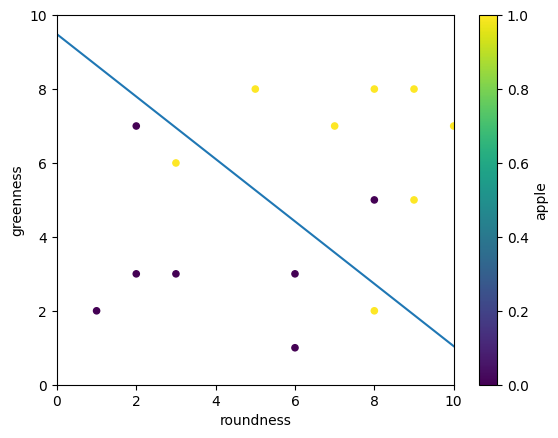

In [15]:
# Actual decision boundary by the model:
# Graphical representation of the decision boundary

fig, ax = plt.subplots()

data.plot(x='roundness',y='greenness',c='apple',kind="scatter", cmap='viridis',ax=ax, xlim=(0,10),ylim=(0,10))

# The decision boundary is where Z==0, let's search the greenness value for each roundness value 
# where this is the case between 0 and 10
x_values= list(range(11))
y_values= []
for x in x_values:
    y= (-intercept-coefs[0]*x)/coefs[1]
    y_values.append(y)

# Plot this:
plt.plot(x_values,y_values)                   # As a line
plt.show()

Solution: add higher order features

Let's not do it manually but automatically

In [16]:
from sklearn.preprocessing import PolynomialFeatures

X = features.values 
y= targets.values
# For example third degree features:
degree=3

# Initialize the polynomial features function
poly=PolynomialFeatures(degree)
# Fit and transform the data (could be split into two lines=> fit, transform)
features_poly = poly.fit_transform(X)

# This will add all possible combinations up to three degrees: Roundness=R and greenness = G:
# R, G, R², G², RG, R³, R²G, RG², G³
# First column is a column of ones (1) representing the 0th power. You can disable it with the parameter include_bias=False
# In general we don't change this.
print(features_poly)

[[   1.    9.    8.   81.   72.   64.  729.  648.  576.  512.]
 [   1.   10.    7.  100.   70.   49. 1000.  700.  490.  343.]
 [   1.    2.    3.    4.    6.    9.    8.   12.   18.   27.]
 [   1.    1.    2.    1.    2.    4.    1.    2.    4.    8.]
 [   1.    5.    8.   25.   40.   64.  125.  200.  320.  512.]
 [   1.    7.    7.   49.   49.   49.  343.  343.  343.  343.]
 [   1.    6.    3.   36.   18.    9.  216.  108.   54.   27.]
 [   1.    3.    3.    9.    9.    9.   27.   27.   27.   27.]
 [   1.    9.    5.   81.   45.   25.  729.  405.  225.  125.]
 [   1.    8.    2.   64.   16.    4.  512.  128.   32.    8.]
 [   1.    8.    5.   64.   40.   25.  512.  320.  200.  125.]
 [   1.    6.    1.   36.    6.    1.  216.   36.    6.    1.]
 [   1.    3.    6.    9.   18.   36.   27.   54.  108.  216.]
 [   1.    8.    8.   64.   64.   64.  512.  512.  512.  512.]
 [   1.    2.    7.    4.   14.   49.    8.   28.   98.  343.]]


In [17]:
logreg_poly = linear_model.LogisticRegression(C=1,max_iter=1000)
logreg_poly.fit(features_poly, y)

score = logreg_poly.score(features_poly,targets)
print("Score: ",score)
print("Coefficients: ", logreg_poly.coef_[0])
print("Intercept: ", logreg_poly.intercept_)

Score:  1.0
Coefficients:  [ 8.69718525e-05 -6.17611543e-02  4.07977889e-02 -4.38368818e-01
  3.71444114e-03  1.66875709e-01  1.77050930e-01 -4.60542285e-01
  5.25518493e-01 -1.06802530e-01]
Intercept:  [-13.27337124]


We can no longer simple calculate the decision boundary since we have polynomial equations (it's possible but more difficult)

Instead we will create a grid of points and calculate the predicted value for each point. Based on this we can plot a contour using the seaborn contour plot function

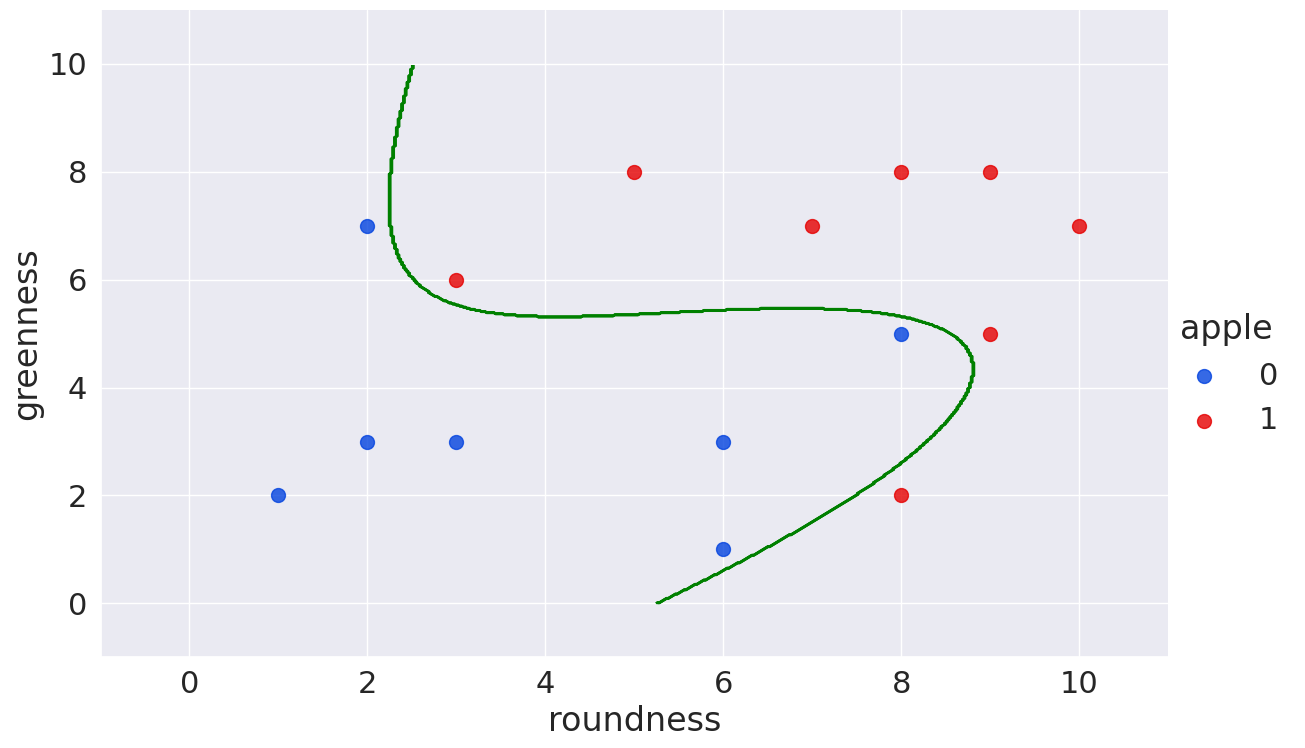

In [18]:
import seaborn as sns
h=0.02 # The distance between points
xx, yy = np.meshgrid(np.arange(0, 10, h),np.arange(0, 10, h)) # x and y values between 0 and 10 with a distance of 0.02

# Create a grid of the x and y points
X_m = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))

# Add the higher order features of every point
X_mf = poly.fit_transform(X_m)
Z = logreg_poly.predict(X_mf)
Z = Z.reshape(xx.shape)


sns.set(font_scale = 2)
colors = ["blue", "red"]
sns.lmplot(x='roundness',y='greenness',data=data,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, height=8, aspect=1.5)
plt.ylim(-1, 11)
plt.xlim(-1, 11)

_=plt.contour(xx, yy, Z, colors='green')   


### More non-linear datasets

In [19]:
data=datasets.make_circles(n_samples=60,noise=0.1,factor=0.3)
X=data[0]
y=data[1]

<Axes: >

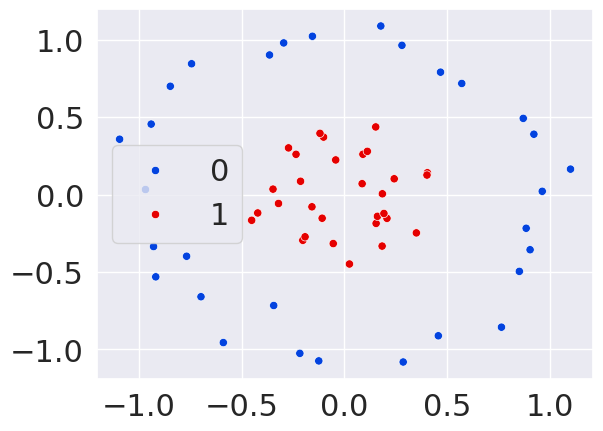

In [20]:
colors = ["blue", "red"]
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette =sns.xkcd_palette(colors))

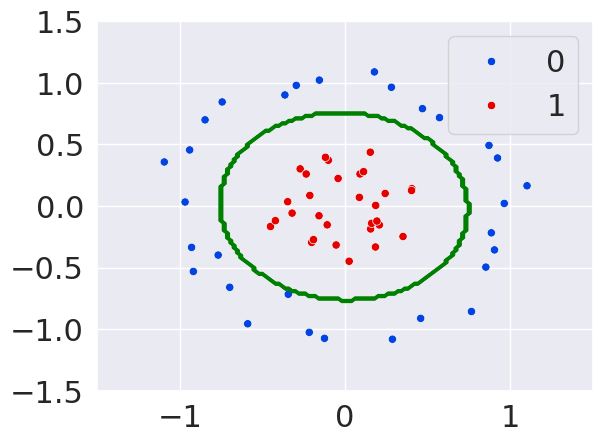

In [21]:
# Polynomial degree to scale
degree=2

# Create the transformer
poly=PolynomialFeatures(degree)
# Add new degrees to the data (fit + transform)
X_poly = poly.fit_transform(X)

# Create a new model 
logreg_poly = linear_model.LogisticRegression(C=1,max_iter=1000)
# Fit the model on the data
logreg_poly.fit(X_poly, y)

h=0.02 # The distance between points
# Create points for x and y
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, h),np.arange(-1.5, 1.5, h))

# Create a grid of the x and y points
X_m = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))

# Add the higher order features of every point
X_mf = poly.fit_transform(X_m)

# Predict the class of each point of the grid
Z = logreg_poly.predict(X_mf)
# Reshape back to the xx shape (needed for contour)
Z = Z.reshape(xx.shape)

# Plot the data
sns.set(font_scale = 2)
colors = ["blue", "red"]
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette =sns.xkcd_palette(colors))
plt.ylim(-1.5, 1.5)
plt.xlim(-1.5, 1.5)

# Add a contour plot
_=plt.contour(xx, yy, Z, colors='green')

## Multi-class classification
Until now we only had 2 classes. What if we had three?

There are two possible strategies
* One-vs-All
* One-vs-One

Imagine following dataset:
![title](../images/multi-class.png)

### One-vs-All

Create a classifier per class. Is a sample part of the class (1) or not (0)?

Total number of classifiers for N classes = N

This is more sensitive to non-balanced data

![title](../images/One-vs-All.png)

### One-vs-One

Create a classifier that discriminates between two classes. Based on the combinations of the outcomes you can predict which class it is.

Total number of classifiers for N classes = $\frac{N(N-1)}{2}$ -> expensive to calculate

This is less sensitive to non-balanced data

![title](../images/One-vs-One.png)

## Evaluation of a classifier
To evaluate a classifier we can use different metrics

We can start of with a confusion matrix:

| Confusion Matrix | P' (Predicted) | n' (Predicted) |
| :- | - | - |
| P(Actual) | True Positive | False Negative |
| n(Actual) | False Positive | True Negative |

Take as an example following confusion matrix:

| CM | P'| n' |
| :- | - | - |
| P | 70 | 15 |
| n | 5 | 10 |

In this case, we can see that 75 predictions were classified as positive (=column 1), however only 70 of the 75 were truely positive (TP). 5 of them were false positives (FP). 

On the other hand, we had 25 predictions were classified as negative (=column 2). Here we see that only 10 were truely negative (TN) and 15 were false negatives (FN).

Based on this confusion matrix we can calculate different metrics. The metric depends on the type of data that you're working with.

### Accuracy
Accuracy: the number of correctly predicted data points out of all the data points.

$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$

In our example: $Accuracy = \frac{70+10}{70+5+15+10} = 80\%$

### Recall
Recall: the ability of a model to find all the relevant cases within a data set.

$Recall = \frac{TP}{TP+FN}$

In our example: 

Positives = $Recall = \frac{70}{70+15} = 82.35\%$

Negatives = $Recall = \frac{10}{5+10} = 66.67\%$

### Precision
Precision: the ability of a classification model to identify only the relevant data points.

$Precision = \frac{TP}{TP+FP}$

In our example:

Positives = $Precision = \frac{70}{70+5} = 93.33\%$

Negatives = $Precision = \frac{10}{15+10} = 40.00\%$

### F1 score
F1 score:  the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Generally, F1 is more useful than accuracy, especially if you have an uneven class distribution.

$F1 score = \frac{2*(Recall*Precision)}{(Recall+Precision)}$

In our example:

Positives = $F1 score = \frac{2*(0.8235*0.9333)}{(0.8235+0.9333)} = 87.50\%$

Negatives = $F1 score = \frac{2*(0.6667*0.4000)}{(0.6667+0.4000)} = 50\%$


In [22]:
logreg_model.coef_

array([[0.56411613, 0.66824472]])

Score:  0.8
Coefficients:  [0.56411613 0.66824472]
Intercept:  [-6.33799462]


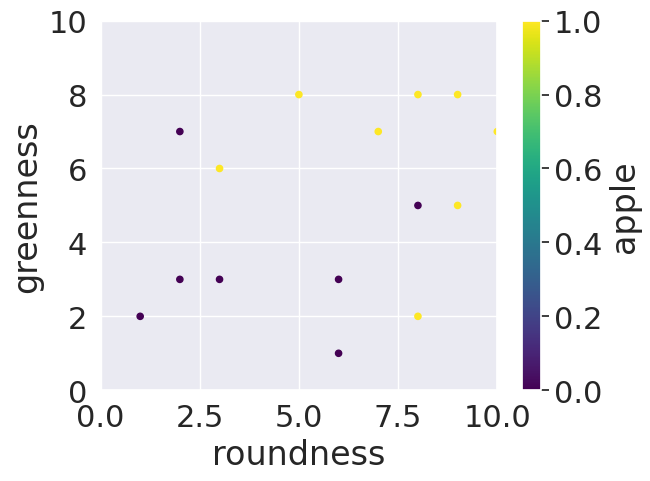

In [23]:
## Metrics in practice

data=pd.read_csv("../data/apples_non_linear.csv")
data
# Split into features and targets
features=data.drop('apple',axis=1)
targets=data['apple']

fig, ax = plt.subplots()

data.plot(x='roundness',y='greenness',c='apple',kind="scatter", cmap='viridis',ax=ax, xlim=(0,10),ylim=(0,10))

logreg_model=linear_model.LogisticRegression(penalty="l2", C=1e5) # penalty here is not required since default is l2

logreg_model.fit(features,targets)
score = logreg_model.score(features,targets)
print("Score: ",score)
print("Coefficients: ", coefs:=logreg_model.coef_[0])
print("Intercept: ", intercept:=logreg_model.intercept_)

[[6 1]
 [2 6]]
True Positives: 6, False Positives: 1, True Negatives: 6, False Negatives: 2


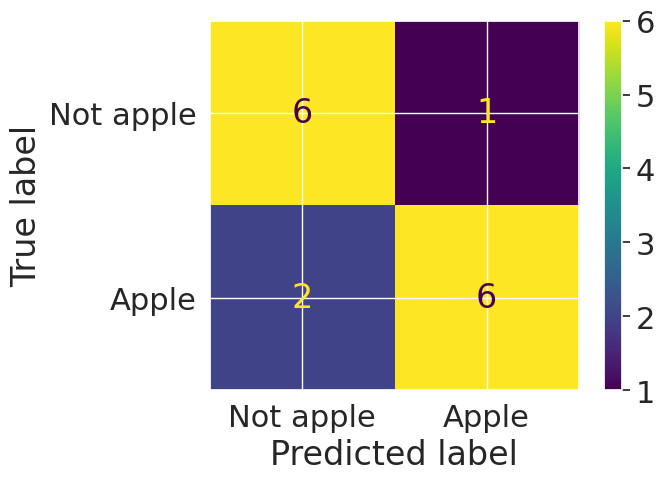

Accuracy: 0.8

Recall (positive): 0.75
Recall (negative): 0.8571428571428571

Precision (positive): 0.8571428571428571
Precision (negative): 0.75

F1 score (positive): 0.8
F1 score (negative): 0.8
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

# The predicted targets for our model
y_pred=logreg_model.predict(features)

## confusion matrix is in form:
# [[TN, FP]
#  [FN, TP]]
print(cf:=confusion_matrix(targets,y_pred)) # Note the use of the walrus operator. 

# Extra: in case of 2 classes (binary classification), you can extract tp,tn,fp and fn:
tn, fp, fn, tp = cf.ravel()
print(f"True Positives: {tp}, False Positives: {fp}, True Negatives: {tn}, False Negatives: {fn}")

# Extra: create a "heatmap" plot of the confustion matrix
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(cf,display_labels=["Not apple","Apple"]) # Without display_labels it will show class
                                                                         # numbers (0|1)
matrix.plot()
plt.show()

# Accuracy
print(f"Accuracy: {accuracy_score(targets,y_pred)}\n")

# Recall
print(f"Recall (positive): {recall_score(targets,y_pred)}")
print(f"Recall (negative): {recall_score(targets,y_pred,pos_label=0)}\n")

# Precision
print(f"Precision (positive): {precision_score(targets,y_pred)}")
print(f"Precision (negative): {precision_score(targets,y_pred,pos_label=0)}\n")

# F1
print(f"F1 score (positive): {f1_score(targets,y_pred)}")
print(f"F1 score (negative): {f1_score(targets,y_pred,pos_label=0)}")

# Note: if multiple classes, choose the desired class by using the pos_label

# All metrics in one:
from sklearn.metrics import classification_report
print(classification_report(targets, y_pred))

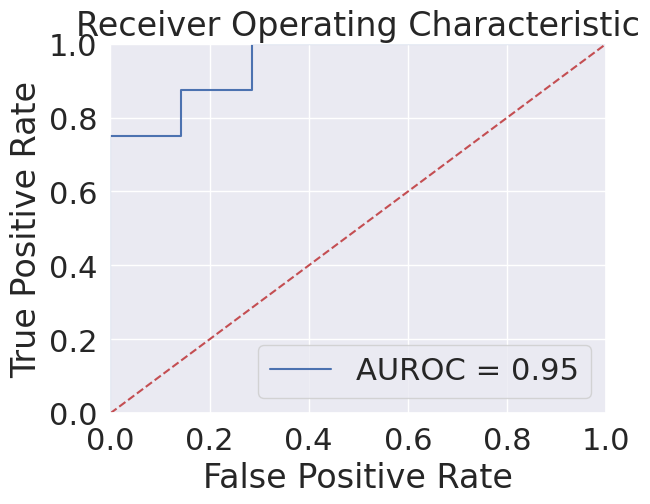

In [25]:
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg_model.predict_proba(features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(targets, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot the roc curce
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()